In [1111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [1112]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1113]:
df = pd.read_excel('./online_retail_II.xlsx')

In [1254]:
df1 = df

In [1255]:
df1['StockCode'].value_counts()

85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
          ... 
35632A       1
82595        1
84030b       1
84877C       1
44276        1
Name: StockCode, Length: 4632, dtype: int64

In [1270]:
df[df['StockCode'] == "85123A"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,13767.0,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
524412,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,2010-12-09 14:44:00,2.95,12872.0,United Kingdom
524519,538095,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-09 14:55:00,2.95,17097.0,Spain
524733,538145,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom
525223,538157,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-09 16:57:00,2.95,17576.0,United Kingdom


In [1256]:
df1 = df1[(df1["StockCode"] == '85123A') & (df1['Country'] == 'United Kingdom')]
df1 = df1.drop(["Country", "Description",  "Invoice", "StockCode", "Customer ID"], axis=1)
df1 = df1[(df1["Quantity"] > 0) & (df1["Price"] > 0)]
df1.head()

,Quantity,InvoiceDate,Price
102,6,2009-12-01 09:46:00,2.95
147,32,2009-12-01 10:06:00,2.55
271,64,2009-12-01 10:52:00,2.55
366,1,2009-12-01 11:34:00,2.95
403,32,2009-12-01 11:37:00,2.55


In [1257]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df1["InvoiceDate"] = df1["InvoiceDate"].dt.strftime("%Y%m%d")
df1
df1.describe()

,Quantity,InvoiceDate,Price
102,6,20091201,2.95
147,32,20091201,2.55
271,64,20091201,2.55
366,1,20091201,2.95
403,32,20091201,2.55
...,...,...,...
524219,7,20101209,5.91
524412,14,20101209,2.95
524733,6,20101209,2.95
525223,4,20101209,2.95


,Quantity,Price
count,3308.000000,3308.000000
mean,16.010278,3.054235
std,40.212197,0.769034
min,1.000000,1.900000
25%,4.000000,2.950000
50%,6.000000,2.950000
75%,12.000000,2.950000
max,936.000000,6.040000


In [1258]:
meanDF = df1.groupby(df1["InvoiceDate"]).agg(['sum', 'mean'])
meanDF
meanDF.describe()

Quantity             Price          
                 sum       mean    sum      mean
InvoiceDate                                     
20091201         255  15.000000  51.24  3.014118
20091202         270  15.882353  52.04  3.061176
20091203         359  16.318182  66.79  3.035909
20091204         167  13.916667  35.00  2.916667
20091205          96  16.000000  16.10  2.683333
...              ...        ...    ...       ...
20101205         198  15.230769  37.55  2.888462
20101206         161  11.500000  49.38  3.527143
20101207         331  22.066667  48.17  3.211333
20101208         151   9.437500  49.36  3.085000
20101209         194  12.933333  46.01  3.067333

[306 rows x 4 columns]

Quantity                   Price            
               sum        mean         sum        mean
count   306.000000  306.000000  306.000000  306.000000
mean    173.078431   16.062106   33.017680    3.065323
std     161.441439   12.078159   14.295763    0.314932
min      12.000000    3.000000    2.550000    2.550000
25%      87.250000    9.569444   23.200000    2.870000
50%     129.500000   13.122222   31.660000    2.950000
75%     199.750000   17.666667   40.510000    3.182727
max    1610.000000  100.900000   83.570000    5.267500

In [1259]:
meanDF1 = pd.DataFrame([], columns=['Quantity', 'Price'])
meanDF1["Quantity"] = meanDF['Quantity']['mean'].values
meanDF1["Price"] = meanDF['Price']['mean'].values
meanDF1
meanDF1.describe()

,Quantity,Price
0,15.000000,3.014118
1,15.882353,3.061176
2,16.318182,3.035909
3,13.916667,2.916667
4,16.000000,2.683333
...,...,...
301,15.230769,2.888462
302,11.500000,3.527143
303,22.066667,3.211333
304,9.437500,3.085000


,Quantity,Price
count,306.000000,306.000000
mean,16.062106,3.065323
std,12.078159,0.314932
min,3.000000,2.550000
25%,9.569444,2.870000
50%,13.122222,2.950000
75%,17.666667,3.182727
max,100.900000,5.267500


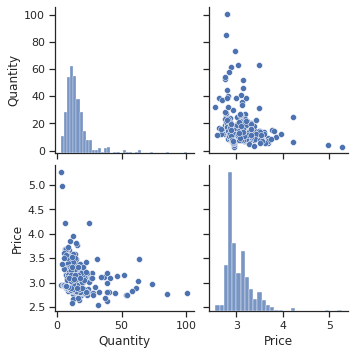

In [1260]:
sns.pairplot(meanDF1)

In [1261]:
meanDF1 = meanDF1 [(meanDF1["Price"] > 2.8) & (meanDF1["Price"] < 2.95) & (meanDF1["Quantity"] < 18) & (meanDF1["Quantity"] > 5)]

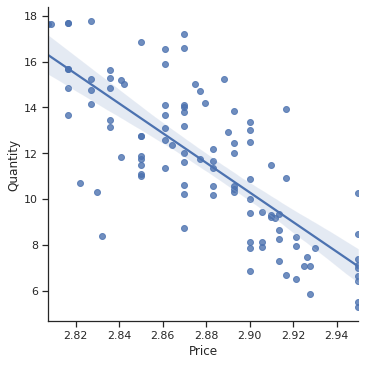

In [1262]:
sns.lmplot(x = "Price", y = "Quantity", data = meanDF1)

In [1263]:
def create_model_and_find_elasticity(data):
    model = ols("Quantity ~ Price", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -64.68591260697247
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     154.3
Date:                Wed, 05 May 2021   Prob (F-statistic):           2.44e-22
Time:                        04:46:26   Log-Likelihood:                -228.92
No. Observations:                 107   AIC:                             461.8
Df Residuals:                     105   BIC:                             467.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


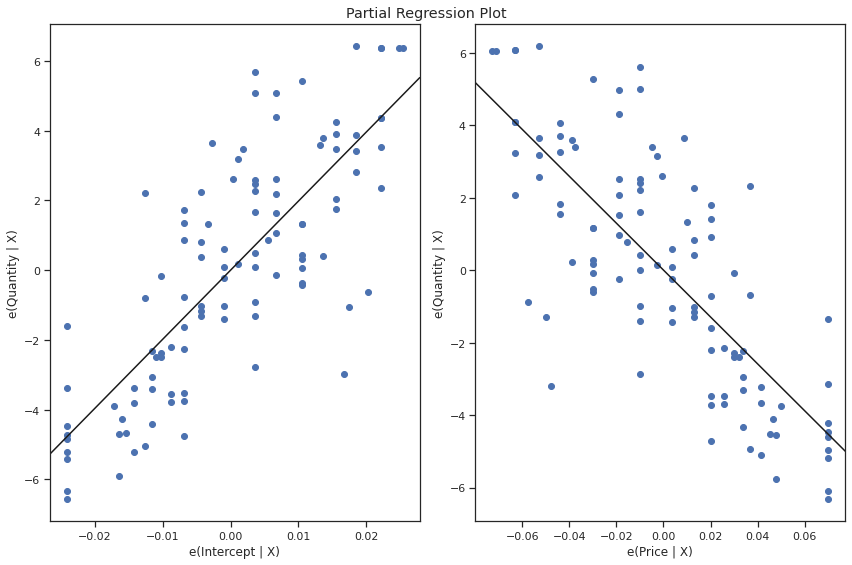

In [1264]:
price_elasticity, model = create_model_and_find_elasticity(meanDF1)

In [1289]:
def find_optimal_Price1(data, model, buying_Price):
    start_Price = data["Price"].min() - 1
    end_Price = data["Price"].min() + 1
    test = pd.DataFrame(columns = ["Price", "Quantity"])
    test['Price'] = np.arange(start_Price, end_Price,0.01)
    test['Quantity'] = model.predict(test['Price'])
    test['Profit'] = (test["Price"] - buying_Price) * test["Quantity"]
    plt.plot(test['Price'],test['Quantity'], label = 'Quantity')
    plt.plot(test['Price'],test['Profit'], label ='Profit')
    plt.xlabel("Price")
    plt.ylabel("Quantity/Profit")
    plt.legend()
    plt.show()
    ind = np.where(test['Profit'] == test['Profit'].max())[0][0]
    values_at_max_Profit = test.iloc[[ind]]
    return values_at_max_Profit

In [1298]:
optimal_price = {}
buying_price = 2

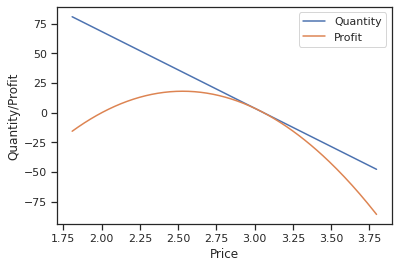

,Price,Quantity,Profit
72,2.527143,34.409875,18.13892


In [1299]:
optimal_price = find_optimal_Price1(meanDF1, model, buying_price)
optimal_price